In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.optimizers import Adam

In [62]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised=True)

W0909 16:49:50.913335 37748 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [63]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

In [64]:
sample_string = 'I like tensorflow but i hate it also.'
tokenized_string = tokenizer.encode(sample_string)
print(tokenized_string)

original_string = tokenizer.decode(tokenized_string)
print(original_string)

[12, 52, 943, 2327, 2934, 7961, 26, 131, 1479, 15, 4509, 7975]
I like tensorflow but i hate it also.


In [65]:
for i in tokenized_string:
    print("{} decode as {}".format(i, tokenizer.decode([i])))

12 decode as I 
52 decode as like 
943 decode as ten
2327 decode as sor
2934 decode as flow
7961 decode as  
26 decode as but 
131 decode as i 
1479 decode as hate 
15 decode as it 
4509 decode as also
7975 decode as .


In [66]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [67]:
train_dataset

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [79]:
output_dim = 64
num_epochs = 10

def train_without_preprocessing():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size, output_dim = output_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.summary()
    
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x = train_dataset, epochs = num_epochs, validation_data = test_dataset)
    return history

history = train_without_preprocessing()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_12  (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 528,065
Trainable params: 528,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


W0909 17:03:57.761150 37748 ag_logging.py:146] Entity <function Function._initialize_uninitialized_variables.<locals>.initialize_variables at 0x0000022D008442F0> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Unable to locate the source code of <function Function._initialize_uninitialized_variables.<locals>.initialize_variables at 0x0000022D008442F0>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code


    174/Unknown - 1s 856ms/step - loss: 0.6936 - accuracy: 0.437 - 1s 443ms/step - loss: 0.6936 - accuracy: 0.429 - 1s 304ms/step - loss: 0.6936 - accuracy: 0.458 - 1s 239ms/step - loss: 0.6936 - accuracy: 0.464 - 1s 197ms/step - loss: 0.6934 - accuracy: 0.475 - 1s 168ms/step - loss: 0.6932 - accuracy: 0.497 - 1s 148ms/step - loss: 0.6933 - accuracy: 0.491 - 1s 133ms/step - loss: 0.6933 - accuracy: 0.492 - 1s 121ms/step - loss: 0.6934 - accuracy: 0.484 - 1s 111ms/step - loss: 0.6933 - accuracy: 0.492 - 1s 104ms/step - loss: 0.6934 - accuracy: 0.485 - 1s 97ms/step - loss: 0.6934 - accuracy: 0.481 - 1s 92ms/step - loss: 0.6934 - accuracy: 0.47 - 1s 87ms/step - loss: 0.6934 - accuracy: 0.48 - 1s 83ms/step - loss: 0.6934 - accuracy: 0.47 - 1s 79ms/step - loss: 0.6933 - accuracy: 0.47 - 1s 76ms/step - loss: 0.6933 - accuracy: 0.48 - 1s 74ms/step - loss: 0.6933 - accuracy: 0.48 - 1s 72ms/step - loss: 0.6934 - accuracy: 0.48 - 1s 69ms/step - loss: 0.6934 - accuracy: 0.48 - 1s 67ms/step - loss

    348/Unknown - 6s 32ms/step - loss: 0.6912 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6912 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6911 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6911 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6910 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6910 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6910 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6909 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6909 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6909 - accuracy: 0.54 - 6s 32ms/step - loss: 0.6908 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6907 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6907 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6907 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6907 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6906 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6906 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6906 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6906 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6905 - accuracy: 0.54 - 6s 31ms/step - loss: 0.6905 - accuracy: 0.

391/391 [==============================]0.6631 - accuracy: 0.612 - 10s 29ms/step - loss: 0.6629 - accuracy: 0.612 - 10s 29ms/step - loss: 0.6625 - accuracy: 0.613 - 10s 29ms/step - loss: 0.6622 - accuracy: 0.613 - 10s 29ms/step - loss: 0.6617 - accuracy: 0.614 - 10s 29ms/step - loss: 0.6614 - accuracy: 0.614 - 10s 29ms/step - loss: 0.6610 - accuracy: 0.615 - 10s 29ms/step - loss: 0.6607 - accuracy: 0.615 - 10s 29ms/step - loss: 0.6604 - accuracy: 0.616 - 10s 29ms/step - loss: 0.6602 - accuracy: 0.616 - 10s 29ms/step - loss: 0.6598 - accuracy: 0.616 - 10s 29ms/step - loss: 0.6595 - accuracy: 0.617 - 10s 29ms/step - loss: 0.6591 - accuracy: 0.617 - 10s 29ms/step - loss: 0.6590 - accuracy: 0.618 - 10s 29ms/step - loss: 0.6585 - accuracy: 0.618 - 10s 29ms/step - loss: 0.6583 - accuracy: 0.619 - 10s 29ms/step - loss: 0.6578 - accuracy: 0.619 - 10s 29ms/step - loss: 0.6575 - accuracy: 0.620 - 10s 29ms/step - loss: 0.6573 - accuracy: 0.620 - 11s 29ms/step - loss: 0.6569 - accuracy: 0.621 - 11

391/391 [==============================] - ETA: 4:02 - loss: 0.4908 - accuracy: 0.81 - ETA: 1:27 - loss: 0.4955 - accuracy: 0.78 - ETA: 56s - loss: 0.4878 - accuracy: 0.8031 - ETA: 38s - loss: 0.5004 - accuracy: 0.781 - ETA: 33s - loss: 0.5040 - accuracy: 0.775 - ETA: 27s - loss: 0.5009 - accuracy: 0.781 - ETA: 23s - loss: 0.5039 - accuracy: 0.776 - ETA: 20s - loss: 0.4975 - accuracy: 0.786 - ETA: 18s - loss: 0.4907 - accuracy: 0.792 - ETA: 18s - loss: 0.4885 - accuracy: 0.795 - ETA: 16s - loss: 0.4853 - accuracy: 0.801 - ETA: 16s - loss: 0.4852 - accuracy: 0.805 - ETA: 15s - loss: 0.4840 - accuracy: 0.804 - ETA: 14s - loss: 0.4826 - accuracy: 0.806 - ETA: 14s - loss: 0.4773 - accuracy: 0.810 - ETA: 13s - loss: 0.4804 - accuracy: 0.806 - ETA: 13s - loss: 0.4791 - accuracy: 0.806 - ETA: 13s - loss: 0.4778 - accuracy: 0.808 - ETA: 13s - loss: 0.4784 - accuracy: 0.805 - ETA: 12s - loss: 0.4783 - accuracy: 0.805 - ETA: 12s - loss: 0.4773 - accuracy: 0.806 - ETA: 12s - loss: 0.4744 - accura

391/391 [==============================] - ETA: 3:54 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:25 - loss: 0.2831 - accuracy: 0.88 - ETA: 55s - loss: 0.3083 - accuracy: 0.8719 - ETA: 38s - loss: 0.2949 - accuracy: 0.880 - ETA: 29s - loss: 0.2821 - accuracy: 0.890 - ETA: 26s - loss: 0.2913 - accuracy: 0.882 - ETA: 24s - loss: 0.2964 - accuracy: 0.882 - ETA: 21s - loss: 0.2994 - accuracy: 0.877 - ETA: 19s - loss: 0.2961 - accuracy: 0.883 - ETA: 18s - loss: 0.2914 - accuracy: 0.885 - ETA: 17s - loss: 0.2936 - accuracy: 0.883 - ETA: 17s - loss: 0.2907 - accuracy: 0.885 - ETA: 16s - loss: 0.2958 - accuracy: 0.881 - ETA: 16s - loss: 0.2969 - accuracy: 0.882 - ETA: 16s - loss: 0.2956 - accuracy: 0.886 - ETA: 15s - loss: 0.2948 - accuracy: 0.885 - ETA: 15s - loss: 0.2942 - accuracy: 0.885 - ETA: 14s - loss: 0.2989 - accuracy: 0.883 - ETA: 14s - loss: 0.3000 - accuracy: 0.883 - ETA: 13s - loss: 0.2992 - accuracy: 0.883 - ETA: 13s - loss: 0.2970 - accuracy: 0.885 - ETA: 13s - loss: 0.2968 - accura

391/391 [==============================] - ETA: 3:53 - loss: 0.1692 - accuracy: 0.96 - ETA: 1:26 - loss: 0.1988 - accuracy: 0.95 - ETA: 55s - loss: 0.2461 - accuracy: 0.9312 - ETA: 42s - loss: 0.2248 - accuracy: 0.930 - ETA: 32s - loss: 0.2146 - accuracy: 0.934 - ETA: 26s - loss: 0.2126 - accuracy: 0.929 - ETA: 23s - loss: 0.2097 - accuracy: 0.929 - ETA: 21s - loss: 0.2061 - accuracy: 0.932 - ETA: 19s - loss: 0.2128 - accuracy: 0.926 - ETA: 18s - loss: 0.2191 - accuracy: 0.923 - ETA: 17s - loss: 0.2216 - accuracy: 0.921 - ETA: 17s - loss: 0.2203 - accuracy: 0.922 - ETA: 16s - loss: 0.2202 - accuracy: 0.921 - ETA: 16s - loss: 0.2188 - accuracy: 0.922 - ETA: 15s - loss: 0.2193 - accuracy: 0.922 - ETA: 14s - loss: 0.2252 - accuracy: 0.921 - ETA: 14s - loss: 0.2283 - accuracy: 0.919 - ETA: 13s - loss: 0.2305 - accuracy: 0.918 - ETA: 13s - loss: 0.2316 - accuracy: 0.917 - ETA: 13s - loss: 0.2285 - accuracy: 0.919 - ETA: 12s - loss: 0.2293 - accuracy: 0.919 - ETA: 12s - loss: 0.2309 - accura

391/391 [==============================] - ETA: 4:03 - loss: 0.1713 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1806 - accuracy: 0.94 - ETA: 57s - loss: 0.1873 - accuracy: 0.9250 - ETA: 43s - loss: 0.1822 - accuracy: 0.933 - ETA: 36s - loss: 0.1757 - accuracy: 0.937 - ETA: 29s - loss: 0.1836 - accuracy: 0.940 - ETA: 26s - loss: 0.1898 - accuracy: 0.938 - ETA: 24s - loss: 0.1956 - accuracy: 0.936 - ETA: 22s - loss: 0.2029 - accuracy: 0.930 - ETA: 20s - loss: 0.2037 - accuracy: 0.928 - ETA: 19s - loss: 0.2111 - accuracy: 0.926 - ETA: 18s - loss: 0.2235 - accuracy: 0.918 - ETA: 17s - loss: 0.2235 - accuracy: 0.918 - ETA: 16s - loss: 0.2229 - accuracy: 0.919 - ETA: 16s - loss: 0.2250 - accuracy: 0.920 - ETA: 15s - loss: 0.2273 - accuracy: 0.917 - ETA: 15s - loss: 0.2276 - accuracy: 0.918 - ETA: 14s - loss: 0.2277 - accuracy: 0.918 - ETA: 14s - loss: 0.2309 - accuracy: 0.916 - ETA: 13s - loss: 0.2321 - accuracy: 0.916 - ETA: 13s - loss: 0.2314 - accuracy: 0.916 - ETA: 13s - loss: 0.2314 - accura

391/391 [==============================] - ETA: 3:43 - loss: 0.0926 - accuracy: 0.98 - ETA: 1:01 - loss: 0.1352 - accuracy: 0.95 - ETA: 39s - loss: 0.1705 - accuracy: 0.9353 - ETA: 32s - loss: 0.1846 - accuracy: 0.930 - ETA: 28s - loss: 0.1861 - accuracy: 0.926 - ETA: 24s - loss: 0.1928 - accuracy: 0.925 - ETA: 22s - loss: 0.1967 - accuracy: 0.925 - ETA: 21s - loss: 0.1921 - accuracy: 0.929 - ETA: 19s - loss: 0.1951 - accuracy: 0.927 - ETA: 18s - loss: 0.1953 - accuracy: 0.925 - ETA: 17s - loss: 0.1983 - accuracy: 0.926 - ETA: 17s - loss: 0.1965 - accuracy: 0.927 - ETA: 15s - loss: 0.1990 - accuracy: 0.927 - ETA: 15s - loss: 0.1999 - accuracy: 0.928 - ETA: 15s - loss: 0.2037 - accuracy: 0.923 - ETA: 14s - loss: 0.2022 - accuracy: 0.924 - ETA: 14s - loss: 0.2016 - accuracy: 0.923 - ETA: 14s - loss: 0.2037 - accuracy: 0.922 - ETA: 13s - loss: 0.2010 - accuracy: 0.924 - ETA: 13s - loss: 0.2030 - accuracy: 0.924 - ETA: 13s - loss: 0.1994 - accuracy: 0.925 - ETA: 13s - loss: 0.1979 - accura

391/391 [==============================] - ETA: 4:07 - loss: 0.1737 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1594 - accuracy: 0.93 - ETA: 49s - loss: 0.1750 - accuracy: 0.9427 - ETA: 39s - loss: 0.2084 - accuracy: 0.933 - ETA: 33s - loss: 0.1981 - accuracy: 0.935 - ETA: 29s - loss: 0.1906 - accuracy: 0.936 - ETA: 26s - loss: 0.1890 - accuracy: 0.934 - ETA: 24s - loss: 0.1836 - accuracy: 0.938 - ETA: 22s - loss: 0.1756 - accuracy: 0.940 - ETA: 21s - loss: 0.1792 - accuracy: 0.938 - ETA: 19s - loss: 0.1801 - accuracy: 0.936 - ETA: 18s - loss: 0.1777 - accuracy: 0.936 - ETA: 17s - loss: 0.1783 - accuracy: 0.936 - ETA: 16s - loss: 0.1776 - accuracy: 0.936 - ETA: 15s - loss: 0.1747 - accuracy: 0.936 - ETA: 14s - loss: 0.1807 - accuracy: 0.935 - ETA: 14s - loss: 0.1790 - accuracy: 0.935 - ETA: 13s - loss: 0.1821 - accuracy: 0.936 - ETA: 13s - loss: 0.1828 - accuracy: 0.936 - ETA: 13s - loss: 0.1821 - accuracy: 0.936 - ETA: 12s - loss: 0.1824 - accuracy: 0.935 - ETA: 12s - loss: 0.1838 - accura

391/391 [==============================] - ETA: 3:39 - loss: 0.0845 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1209 - accuracy: 0.95 - ETA: 37s - loss: 0.1368 - accuracy: 0.9487 - ETA: 28s - loss: 0.1395 - accuracy: 0.948 - ETA: 23s - loss: 0.1442 - accuracy: 0.945 - ETA: 20s - loss: 0.1431 - accuracy: 0.948 - ETA: 19s - loss: 0.1403 - accuracy: 0.949 - ETA: 17s - loss: 0.1434 - accuracy: 0.947 - ETA: 16s - loss: 0.1426 - accuracy: 0.949 - ETA: 15s - loss: 0.1406 - accuracy: 0.950 - ETA: 15s - loss: 0.1415 - accuracy: 0.949 - ETA: 14s - loss: 0.1406 - accuracy: 0.950 - ETA: 13s - loss: 0.1411 - accuracy: 0.950 - ETA: 13s - loss: 0.1421 - accuracy: 0.948 - ETA: 12s - loss: 0.1423 - accuracy: 0.949 - ETA: 12s - loss: 0.1413 - accuracy: 0.949 - ETA: 11s - loss: 0.1396 - accuracy: 0.950 - ETA: 11s - loss: 0.1409 - accuracy: 0.950 - ETA: 11s - loss: 0.1398 - accuracy: 0.951 - ETA: 10s - loss: 0.1428 - accuracy: 0.951 - ETA: 10s - loss: 0.1424 - accuracy: 0.951 - ETA: 10s - loss: 0.1427 - accura

391/391 [==============================] - ETA: 3:35 - loss: 0.1299 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1455 - accuracy: 0.95 - ETA: 51s - loss: 0.1505 - accuracy: 0.9594 - ETA: 35s - loss: 0.1600 - accuracy: 0.955 - ETA: 27s - loss: 0.1637 - accuracy: 0.954 - ETA: 23s - loss: 0.1576 - accuracy: 0.953 - ETA: 21s - loss: 0.1529 - accuracy: 0.957 - ETA: 20s - loss: 0.1513 - accuracy: 0.954 - ETA: 18s - loss: 0.1498 - accuracy: 0.954 - ETA: 16s - loss: 0.1456 - accuracy: 0.955 - ETA: 15s - loss: 0.1419 - accuracy: 0.957 - ETA: 14s - loss: 0.1424 - accuracy: 0.956 - ETA: 14s - loss: 0.1390 - accuracy: 0.957 - ETA: 13s - loss: 0.1384 - accuracy: 0.957 - ETA: 12s - loss: 0.1377 - accuracy: 0.956 - ETA: 12s - loss: 0.1341 - accuracy: 0.958 - ETA: 12s - loss: 0.1368 - accuracy: 0.956 - ETA: 11s - loss: 0.1365 - accuracy: 0.956 - ETA: 11s - loss: 0.1380 - accuracy: 0.955 - ETA: 11s - loss: 0.1423 - accuracy: 0.951 - ETA: 11s - loss: 0.1426 - accuracy: 0.951 - ETA: 11s - loss: 0.1445 - accura

391/391 [==============================] - ETA: 3:43 - loss: 0.1291 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1157 - accuracy: 0.95 - ETA: 38s - loss: 0.1180 - accuracy: 0.9531 - ETA: 29s - loss: 0.1090 - accuracy: 0.960 - ETA: 26s - loss: 0.1126 - accuracy: 0.958 - ETA: 22s - loss: 0.1201 - accuracy: 0.960 - ETA: 20s - loss: 0.1155 - accuracy: 0.964 - ETA: 18s - loss: 0.1232 - accuracy: 0.961 - ETA: 17s - loss: 0.1256 - accuracy: 0.957 - ETA: 16s - loss: 0.1214 - accuracy: 0.960 - ETA: 16s - loss: 0.1233 - accuracy: 0.958 - ETA: 15s - loss: 0.1219 - accuracy: 0.960 - ETA: 14s - loss: 0.1239 - accuracy: 0.959 - ETA: 14s - loss: 0.1236 - accuracy: 0.960 - ETA: 13s - loss: 0.1258 - accuracy: 0.959 - ETA: 13s - loss: 0.1229 - accuracy: 0.960 - ETA: 13s - loss: 0.1263 - accuracy: 0.960 - ETA: 12s - loss: 0.1297 - accuracy: 0.957 - ETA: 12s - loss: 0.1289 - accuracy: 0.958 - ETA: 11s - loss: 0.1281 - accuracy: 0.958 - ETA: 11s - loss: 0.1272 - accuracy: 0.958 - ETA: 11s - loss: 0.1290 - accura

<Figure size 432x288 with 0 Axes>

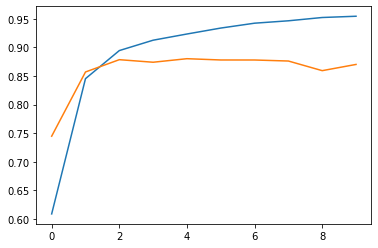

<Figure size 432x288 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hisotry.history['accuracy'])
plt.plot(hisotry.history['val_accuracy'])
plt.figure()

<Figure size 432x288 with 0 Axes>

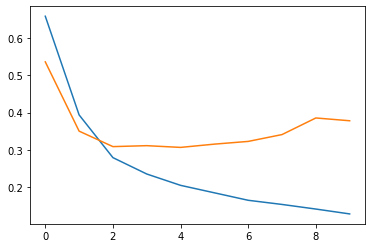

<Figure size 432x288 with 0 Axes>

In [77]:
plt.plot(hisotry.history['loss'])
plt.plot(hisotry.history['val_loss'])
plt.figure()